Problem Statement:

About Company
* Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Problem
* The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In [4]:
# read the data
train = pd.read_csv('loan_sanction_train.csv')

In [5]:
# get the information about the column names, data types and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# look at the firat few rows of the data
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
# get the percentage of missing values in each column
train.isna().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
# get the unique values in each column
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Univariate Analysis

## Loan Status

In [8]:
# Check the target varaible for distribution of classes
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Loan_ID

In [9]:
# check whether Loan_ID is unique
train['Loan_ID'].is_unique

True

In [10]:
# drop the Loan_ID from the data
train.drop(columns=['Loan_ID'], inplace=True)

## Gender

In [16]:
# check the value counts for gender
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

## Married

In [17]:
# check the value counts for Married
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

## Dependents

In [13]:
# check the value counts for Dependents
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

## Education

In [14]:
# check the value counts for Education
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## Self-Employed

In [19]:
# check the value counts for Self-Employed
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [ ]:
# Write down your inferences from above analysis
# at least 1-1 points about every feature 

## Applicant Income

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

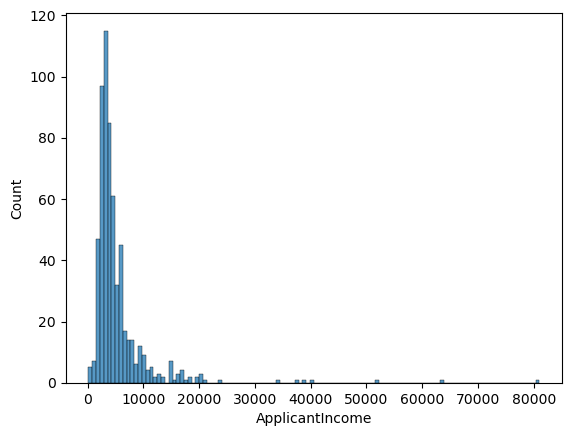

In [17]:
# check the distribution of ApplicantIncome
sns.histplot(train['ApplicantIncome'])

## Coapplicant Income

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

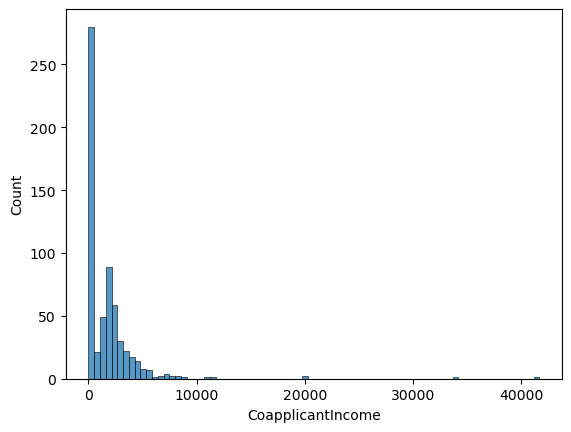

In [18]:
# check the distribution of CoapplicantIncome
sns.histplot(train['CoapplicantIncome'])

## Loan Amount

<Axes: xlabel='LoanAmount', ylabel='Count'>

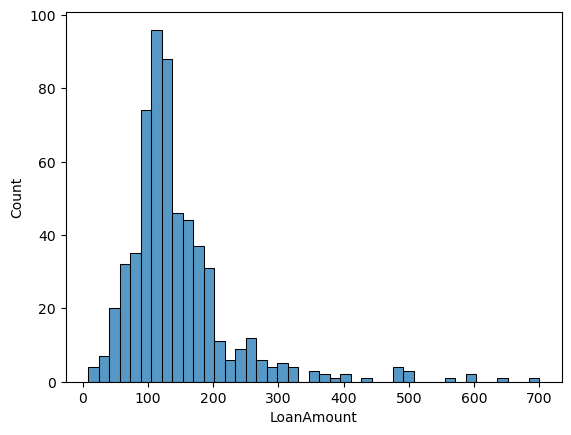

In [19]:
# check the distribution of LoanAmount
sns.histplot(train['LoanAmount'])

## Loan Amount Term

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

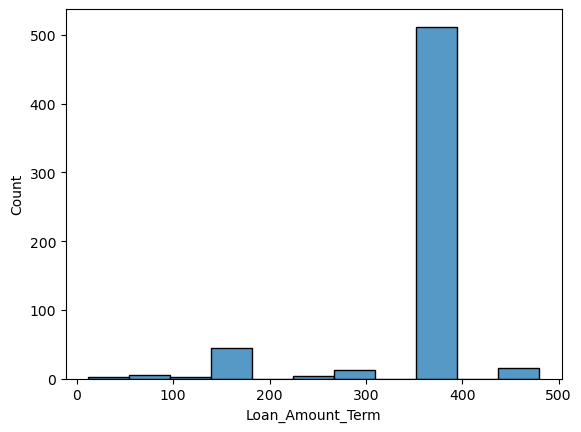

In [20]:
# check the distribution of Loan_Amount_Term
sns.histplot(train['Loan_Amount_Term'])

## Credit History

In [21]:
# check the value counts of Credit_History
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

## Property Area

In [22]:
# check the distribution of Property_Area
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## create categorical and continuous columns list

In [20]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                       'Credit_History', 'Property_Area', 'Loan_Status']

In [21]:
continuous_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

## Count plot

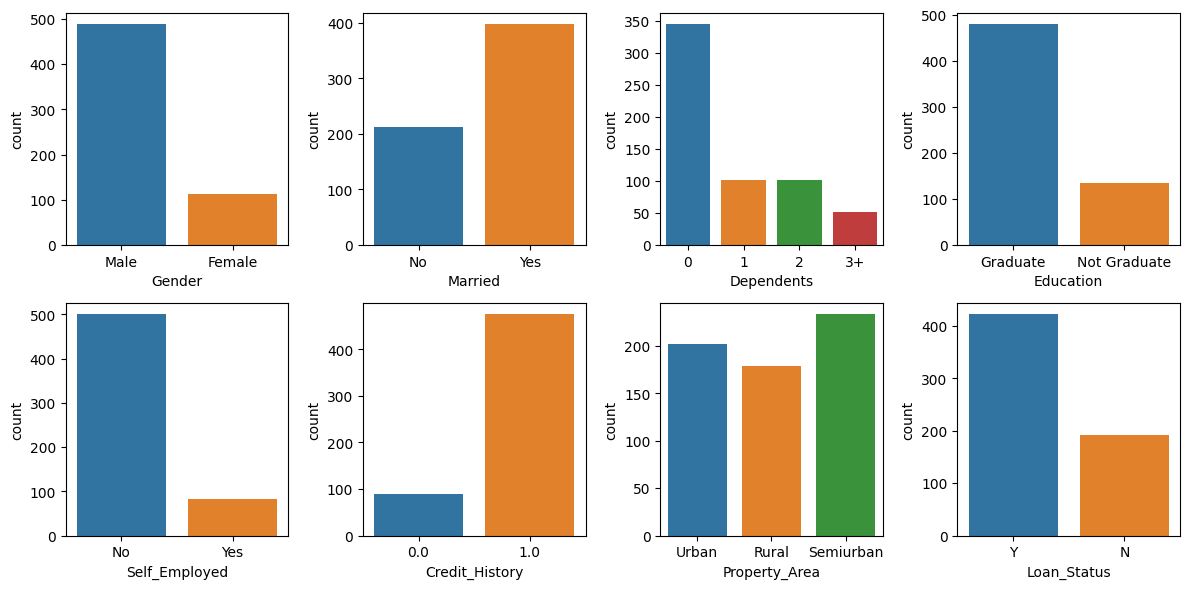

In [31]:
# Create count plots for all the categorical columns
fig, axes = plt.subplots(2, 4, figsize=(12,6))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical_columns[i]], ax=ax)
plt.tight_layout()

## Box plot

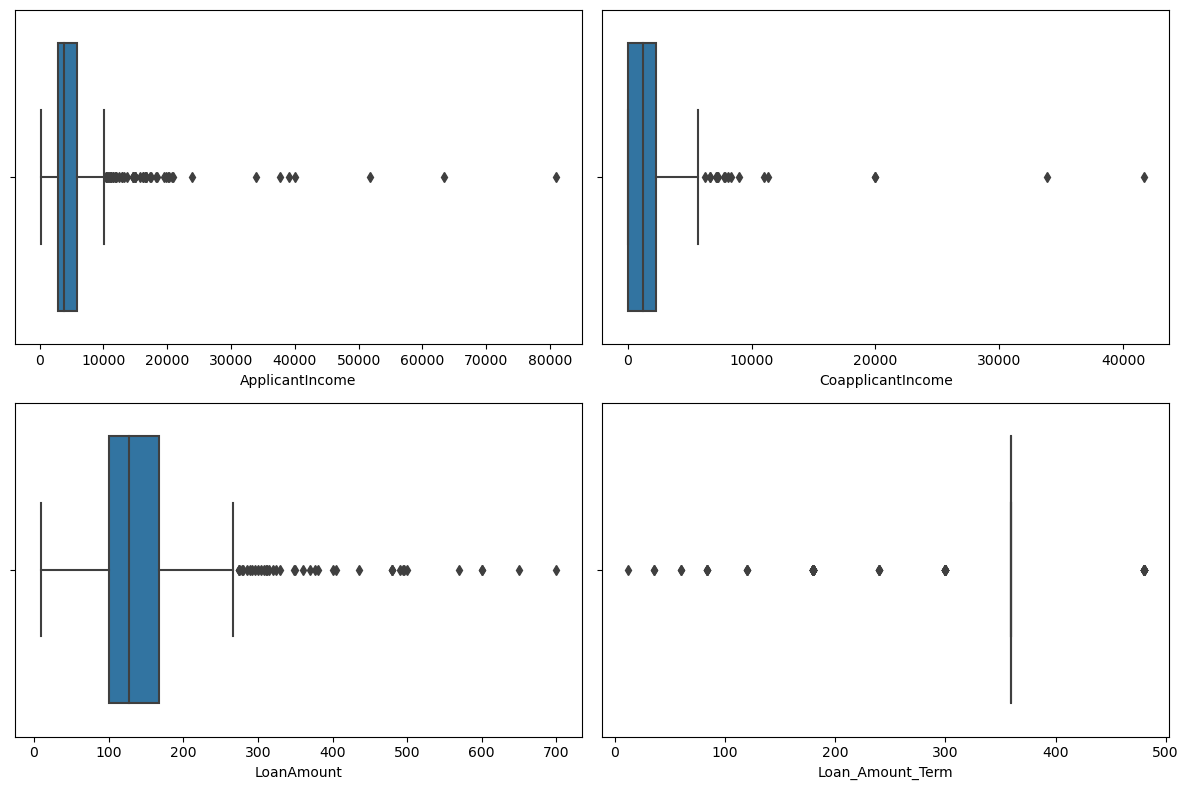

In [26]:
# create box plot for all continuous columns
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.boxplot(x=train[continuous_columns[i]], ax=ax)
plt.tight_layout()

## Inferences

In [27]:
# wrire inferences about the univariate analysis done above

# Bi-variate analysis

## continuous variables with target variable

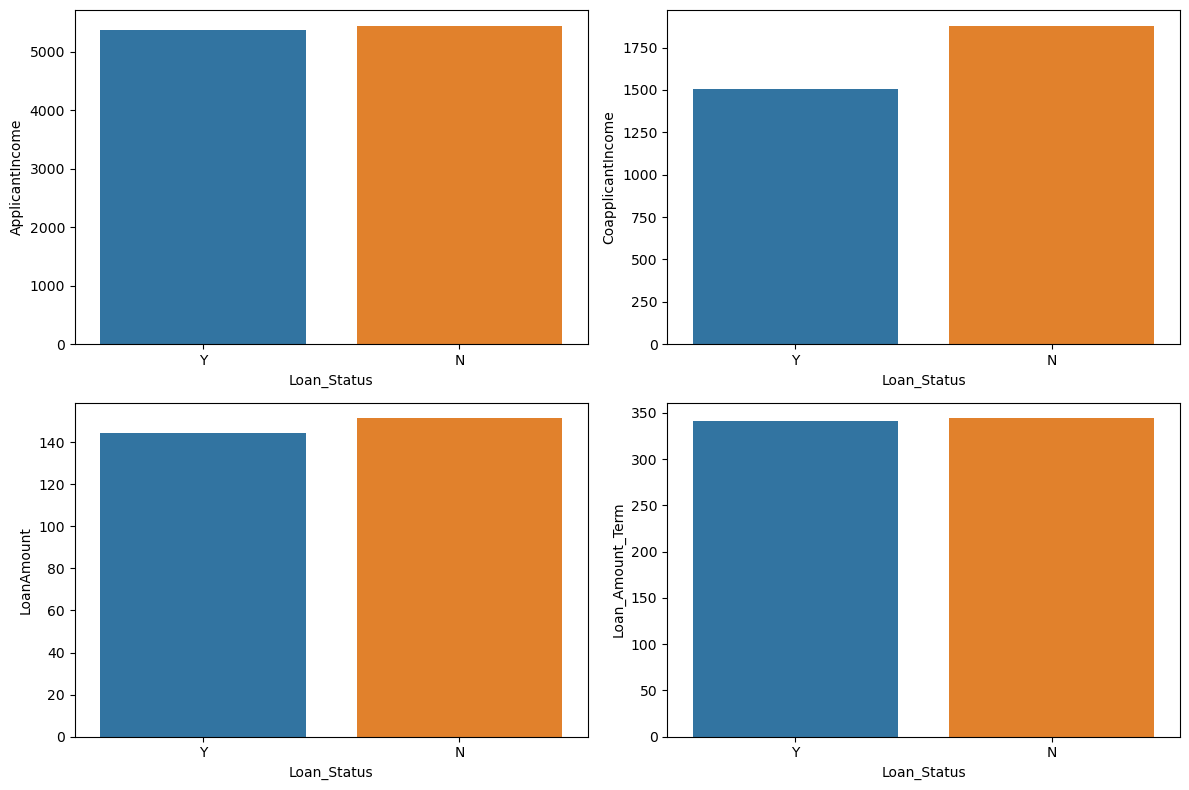

In [28]:
# Create barplot with continuous variables and target variable
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(y=train[continuous_columns[i]], x=train['Loan_Status'], ax=ax, errorbar=None)
plt.tight_layout()

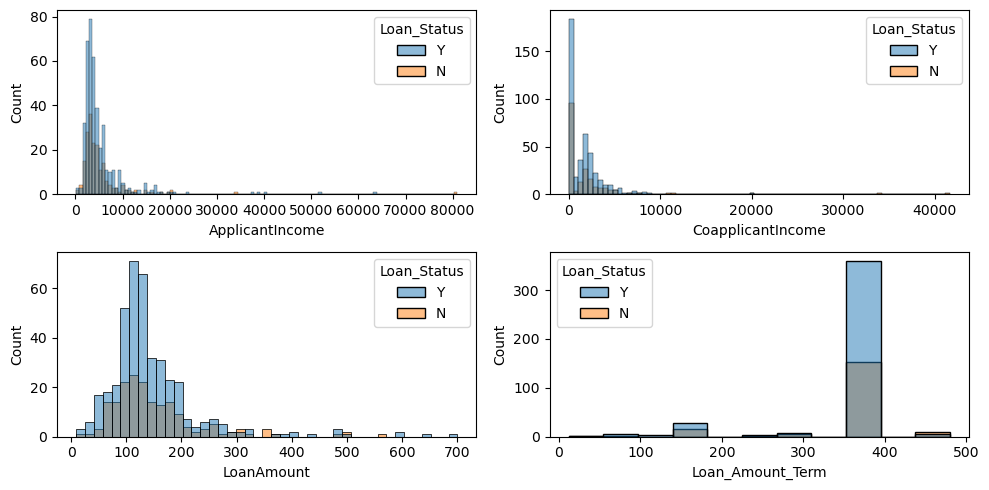

In [29]:
# Create histogram with continuous variables and target variable as hue
fig, axes = plt.subplots(2, 2, figsize=(10,5))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(data=train, x=continuous_columns[i], hue='Loan_Status', ax=ax)
plt.tight_layout()

## categorical variables with target variable

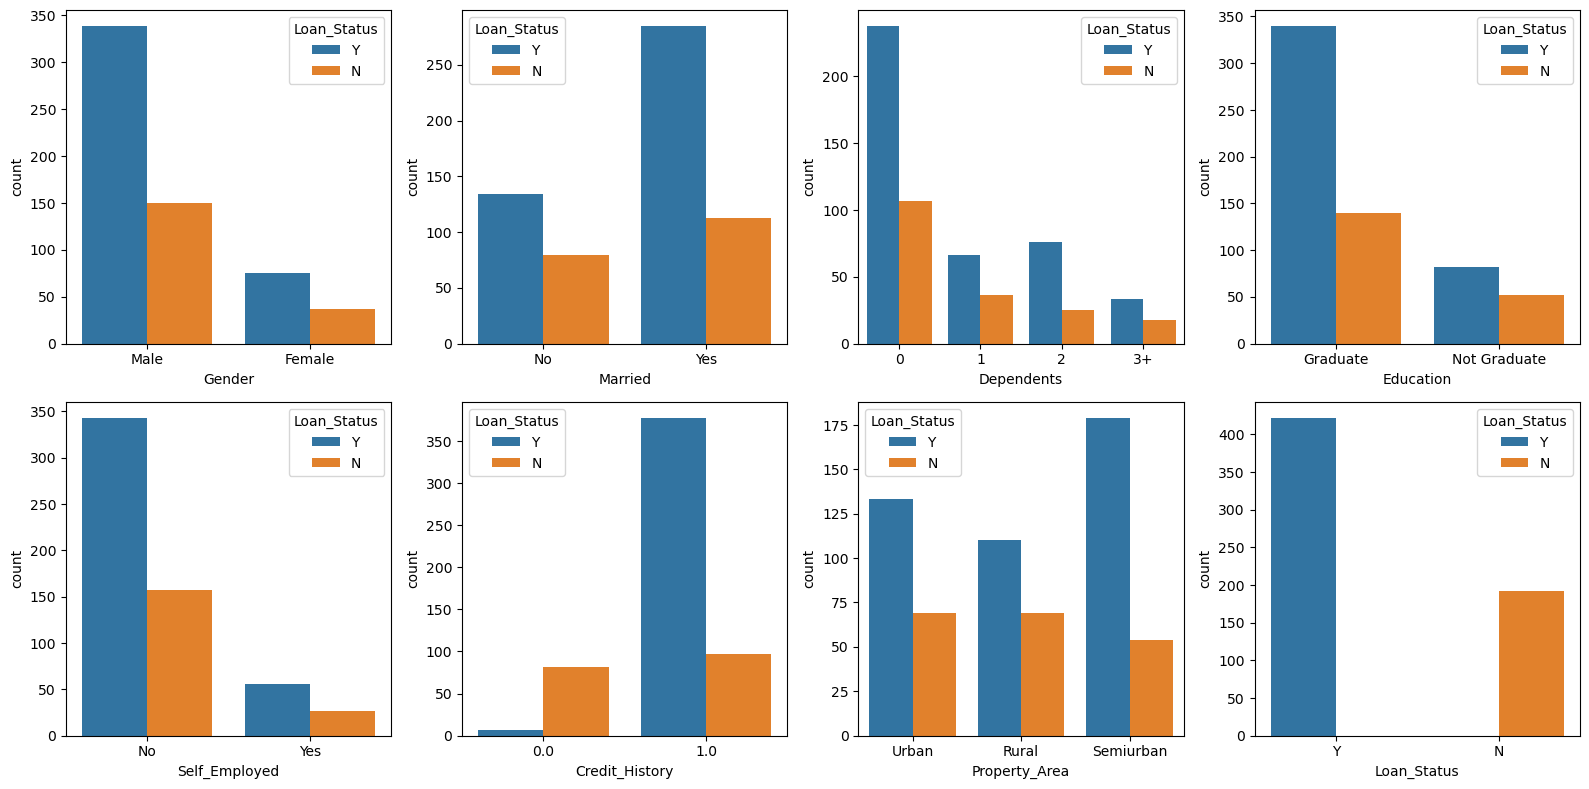

In [30]:
# Create count plot with categorical variables and target variable
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train[categorical_columns[i]], hue=train['Loan_Status'], ax=ax)
plt.tight_layout()

## heatamp of correlations

<Axes: >

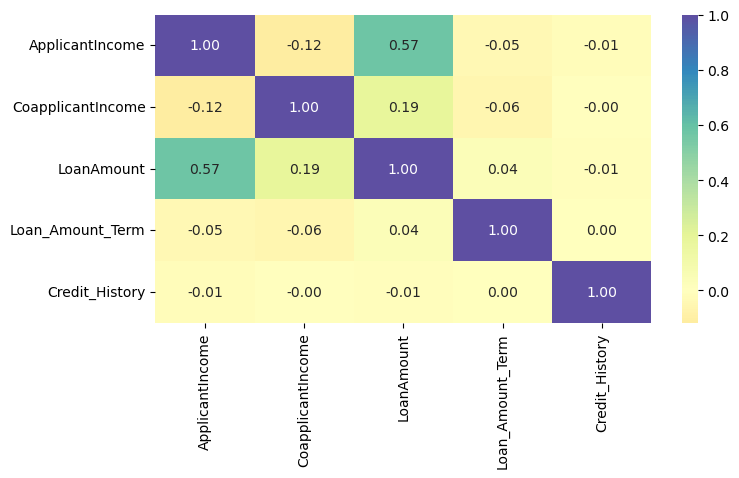

In [31]:
# plot heatmap of correlations
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='Spectral', center=0, fmt='.2f')

## Pair plot

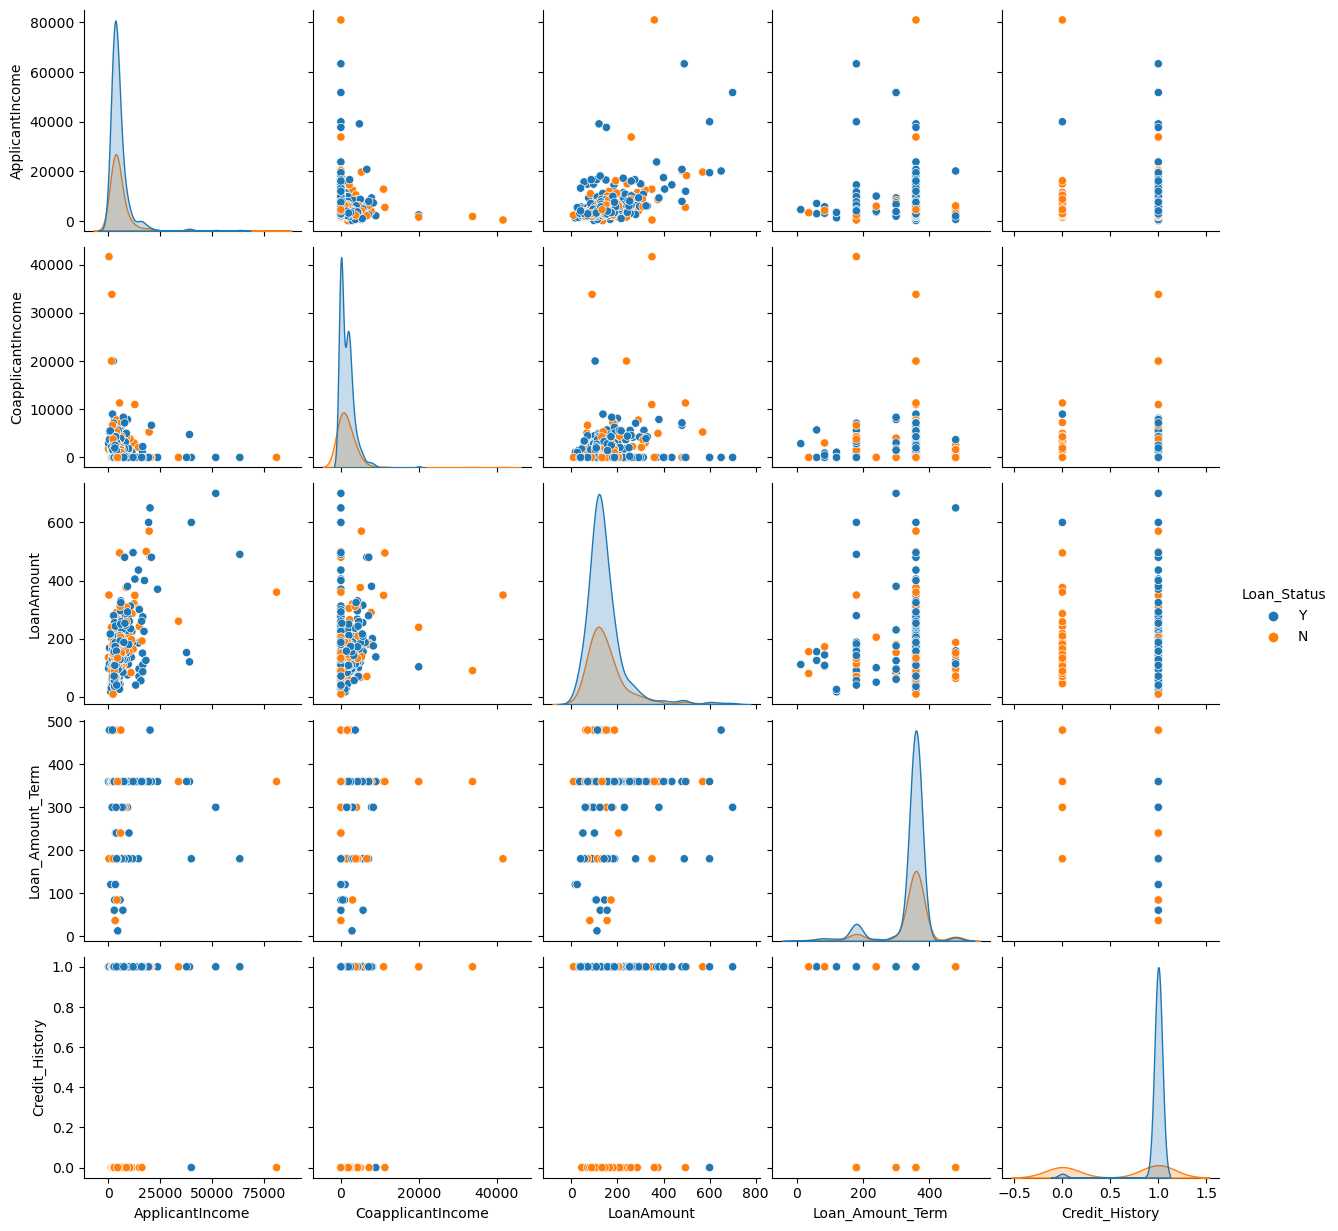

In [32]:
# create pair plot with target variable as hue
sns.pairplot(data=train, hue='Loan_Status')

## Inferences

In [33]:
# wrire inferences about the Bivaraite analysis done above

# Preprocessing

In [34]:
# import libraries
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
# create train and test datasets

In [36]:
X = train.drop(columns=['Loan_Status'])

In [37]:
y = train['Loan_Status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

## missing values imputation

In [39]:
X_train.isna().sum()

Gender                9
Married               1
Dependents            8
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     11
Credit_History       36
Property_Area         0
dtype: int64

In [40]:
continuous_columns

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [41]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [42]:
# imptute missing values of categorical features with mode and continuous features with median